In [49]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_name = "inclusionAI/Ling-lite"

tokenizer = AutoTokenizer.from_pretrained(model_name)

prompt = "Give me a short introduction to large language models."
messages = [
    {"role": "system", "content": "You are Ling, an assistant created by inclusionAI"},
    {"role": "user", "content": prompt}
]
text = tokenizer.apply_chat_template(
    messages,
    tokenize=False,
    add_generation_prompt=True
)


In [58]:
tokenizer.encode('Hello<think>')

[14455, 27, 30583, 29]

In [45]:
a = [0.08, 0.04, 0.01, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005,  0.005, 0.005, 0.005]

In [47]:
import numpy as np
a = np.array(a)
a/a[:6].sum()

array([0.55172414, 0.27586207, 0.06896552, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276])

In [48]:
b = a/a[:6].sum()
b.sum()

1.2068965517241381

In [3]:
32*8

256

In [2]:
text

'<|im_start|>system\nYou are Ling, an assistant created by inclusionAI<|im_end|>\n<|im_start|>user\nGive me a short introduction to large language models.<|im_end|>\n<|im_start|>assistant\n'

In [ ]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# Load the Qwen3-30B-A3B model from the specified cache directory
model_name = "Qwen/Qwen3-30B-A3B"
cache_dir = "/fsx-project/rishabhtiwari/hf_cache"

print(f"Loading model: {model_name}")
print(f"Cache directory: {cache_dir}")

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(
    model_name,
    cache_dir=cache_dir,
    trust_remote_code=True
)

# Load model
from transformers import AutoConfig

# Load config first
config = AutoConfig.from_pretrained(
    model_name,
    cache_dir=cache_dir,
    trust_remote_code=True
)

# Initialize model from config without pretrained weights
model = AutoModelForCausalLM.from_config(
    config,
    torch_dtype=torch.bfloat16,
    trust_remote_code=True,
)

# Move to device
# model = model.to("cuda" if torch.cuda.is_available() else "cpu")

print("Model loaded successfully!")
print(f"Model type: {type(model)}")
print(f"Model device: {next(model.parameters()).device}")


In [6]:
from transformers import AutoTokenizer, AutoModelForCausalLM
cache_dir = "/checkpoint/compact-models/rishabhtiwari/hf_cache"

tokenizer = AutoTokenizer.from_pretrained(
    "/checkpoint/compact-models/rishabhtiwari/hf_cache/Qwen--Qwen3-30B-A3B-Base/",
    cache_dir=cache_dir,
    trust_remote_code=True
)

In [7]:
tokenizer.chat_template

'{%- if tools %}\n    {{- \'<|im_start|>system\\n\' }}\n    {%- if messages[0].role == \'system\' %}\n        {{- messages[0].content + \'\\n\\n\' }}\n    {%- endif %}\n    {{- "# Tools\\n\\nYou may call one or more functions to assist with the user query.\\n\\nYou are provided with function signatures within <tools></tools> XML tags:\\n<tools>" }}\n    {%- for tool in tools %}\n        {{- "\\n" }}\n        {{- tool | tojson }}\n    {%- endfor %}\n    {{- "\\n</tools>\\n\\nFor each function call, return a json object with function name and arguments within <tool_call></tool_call> XML tags:\\n<tool_call>\\n{\\"name\\": <function-name>, \\"arguments\\": <args-json-object>}\\n</tool_call><|im_end|>\\n" }}\n{%- else %}\n    {%- if messages[0].role == \'system\' %}\n        {{- \'<|im_start|>system\\n\' + messages[0].content + \'<|im_end|>\\n\' }}\n    {%- endif %}\n{%- endif %}\n{%- set ns = namespace(multi_step_tool=true, last_query_index=messages|length - 1) %}\n{%- for message in messa

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
cache_dir = "/fsx-project/rishabhtiwari/hf_cache"

tokenizer = AutoTokenizer.from_pretrained(
    "/home/rishabhtiwari/hf_cache/Qwen--Qwen3-30B-A3B-Base/",
    cache_dir=cache_dir,
    trust_remote_code=True
)

/home/rishabhtiwari/.conda/envs/01_training/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from llamafactory.data.template import parse_template

In [8]:
template = parse_template(tokenizer)

True

In [4]:
tokenizer.chat_template

'{%- if tools %}\n    {{- \'<|im_start|>system\\n\' }}\n    {%- if messages[0].role == \'system\' %}\n        {{- messages[0].content + \'\\n\\n\' }}\n    {%- endif %}\n    {{- "# Tools\\n\\nYou may call one or more functions to assist with the user query.\\n\\nYou are provided with function signatures within <tools></tools> XML tags:\\n<tools>" }}\n    {%- for tool in tools %}\n        {{- "\\n" }}\n        {{- tool | tojson }}\n    {%- endfor %}\n    {{- "\\n</tools>\\n\\nFor each function call, return a json object with function name and arguments within <tool_call></tool_call> XML tags:\\n<tool_call>\\n{\\"name\\": <function-name>, \\"arguments\\": <args-json-object>}\\n</tool_call><|im_end|>\\n" }}\n{%- else %}\n    {%- if messages[0].role == \'system\' %}\n        {{- \'<|im_start|>system\\n\' + messages[0].content + \'<|im_end|>\\n\' }}\n    {%- endif %}\n{%- endif %}\n{%- set ns = namespace(multi_step_tool=true, last_query_index=messages|length - 1) %}\n{%- for message in messa

In [1]:
from huggingface_hub import hf_hub_download
import json
config_path = hf_hub_download(repo_id="open-thoughts/OpenThoughts3-1.2M", filename="data", repo_type="dataset", cache_dir="/checkpoint/compact-models/rishabhtiwari/hf_cache/")

with open(config_path, 'r') as f:
    config = json.load(f)

print(config)

/home/rishabhtiwari/.conda/envs/01_training/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


EntryNotFoundError: 404 Client Error. (Request ID: Root=1-68cf5342-3ab3ad371b17caf65f4d65df;7c64f6ff-183f-4347-bdd6-11ea13e0259c)

Entry Not Found for url: https://huggingface.co/datasets/open-thoughts/OpenThoughts3-1.2M/resolve/main/data.

In [1]:
# from datasets import load_dataset
# dataset = load_dataset("open-thoughts/OpenThoughts3-1.2M", cache_dir="/checkpoint/compact-models/rishabhtiwari/hf_cache")

from datasets import load_dataset
dataset = load_dataset("AI-MO/NuminaMath-CoT", cache_dir="/checkpoint/compact-models/rishabhtiwari/hf_cache")

/home/rishabhtiwari/.conda/envs/01_training/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating test split: 100%|██████████| 100/100 [00:00<00:00, 18399.30 examples/s]


In [2]:
dataset

DatasetDict({
    train: Dataset({
        features: ['source', 'problem', 'solution', 'messages'],
        num_rows: 859494
    })
    test: Dataset({
        features: ['source', 'problem', 'solution', 'messages'],
        num_rows: 100
    })
})

In [5]:
import datasets
dataset = datasets.load_dataset("open-thoughts/OpenThoughts3-1.2M", cache_dir="/checkpoint/compact-models/rishabhtiwari/hf_cache")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['difficulty', 'source', 'domain', 'conversations'],
        num_rows: 1200000
    })
})


In [6]:
dataset['train']

Dataset({
    features: ['difficulty', 'source', 'domain', 'conversations'],
    num_rows: 1200000
})

In [5]:
dataset['train'][0]['messages']

[{'content': 'Consider the terms of an arithmetic sequence: $-\\frac{1}{3}, y+2, 4y, \\ldots$. Solve for $y$.',
  'role': 'user'},
 {'content': 'For an arithmetic sequence, the difference between consecutive terms must be equal. Therefore, we can set up the following equations based on the sequence given:\n\\[ (y + 2) - \\left(-\\frac{1}{3}\\right) = 4y - (y+2) \\]\n\nSimplify and solve these equations:\n\\[ y + 2 + \\frac{1}{3} = 4y - y - 2 \\]\n\\[ y + \\frac{7}{3} = 3y - 2 \\]\n\\[ \\frac{7}{3} + 2 = 3y - y \\]\n\\[ \\frac{13}{3} = 2y \\]\n\\[ y = \\frac{13}{6} \\]\n\nThus, the value of $y$ that satisfies the given arithmetic sequence is $\\boxed{\\frac{13}{6}}$.',
  'role': 'assistant'}]

In [8]:
# Filter dataset based on source
# First, let's see what sources are available
domains = set(dataset['train']['domain'])
print("Available domains:")
for domain in sorted(domains):
    print(f"  - {domain}")

print(f"\nTotal number of domains: {len(domains)}")

# Example: Filter by a specific source (replace 'your_source' with actual source name)
# filtered_dataset = dataset['train'].filter(lambda x: x['source'] == 'your_source')

# Example: Filter by multiple sources
domains_to_keep = ['math']
filtered_dataset = dataset['train'].filter(lambda x: x['domain'] in domains_to_keep)

# Example: Filter out specific sources
# sources_to_exclude = ['source_to_exclude']
# filtered_dataset = dataset['train'].filter(lambda x: x['source'] not in sources_to_exclude)


Available domains:
  - code
  - math
  - science

Total number of domains: 3


Filter: 100%|██████████| 1200000/1200000 [07:47<00:00, 2566.77 examples/s]


In [30]:
dataset['train'][-200000]

{'difficulty': None,
 'source': 'ai2-adapt-dev/openmath-2-math',
 'domain': 'math',
 'conversations': [{'from': 'human',
   'value': 'Determine the least positive integer $n$ such that the remainders of $n^2$, $2n$, and $3n$ upon division by 7, 11, and 13 respectively are all the same.'},
  {'from': 'gpt',
   'value': '<think> Okay, so I have this problem here: I need to find the smallest positive integer n such that when I divide n² by 7, 2n by 11, and 3n by 13, all three remainders are the same. Hmm, okay. Let me try to break this down step by step.\n\nFirst, let me rephrase the problem in my own words to make sure I understand it. The problem says that the remainders of n² divided by 7, 2n divided by 11, and 3n divided by 13 are all the same. So, that means if I compute each of these three expressions and then take their remainders modulo 7, 11, and 13 respectively, those remainders should be equal. And I need the smallest such n. Alright.\n\nAlright, let\'s denote the common remain

In [9]:
# Print count of difficulty levels
difficulty_counts = {}
for example in filtered_dataset:
    difficulty = example['difficulty']
    difficulty_counts[difficulty] = difficulty_counts.get(difficulty, 0) + 1

print("Difficulty level counts:")
for difficulty in sorted(difficulty_counts.keys()):
    print(f"  Difficulty {difficulty}: {difficulty_counts[difficulty]} examples")

print(f"\nTotal examples: {sum(difficulty_counts.values())}")


Difficulty level counts:
  Difficulty None: 850000 examples

Total examples: 850000


In [31]:
dataset['train'] = filtered_dataset

In [13]:
dataset['train'][1085]

{'difficulty': 8,
 'source': 'stackexchange_codegolf',
 'domain': 'code',
 'conversations': [{'from': 'human',
   'value': "You may know the mathematician von Koch by his famous snowflake. However he has more interesting computer science problems up his sleeves.\nIndeed, let's take a look at this conjecture:\nGiven a tree with n nodes (thus n-1 edges). Find a way to enumerate the nodes from 1 to n and, accordingly, the edges from 1 to n-1 in such a way, that for each edge k the difference of its node numbers equals to k. The conjecture is that this is always possible.\nHere's an example to make it perfectly clear : \n\nYOUR TASK \nYour code will take as input a tree, you can take the format you want but for the test cases I will provide the tree by their arcs and the list of their nodes.\nFor example this is the input for the tree in the picture : \n[a,b,c,d,e,f,g]\nd -> a\na -> b\na -> g\nb -> c\nb -> e\ne -> f\n\nYour code must return the tree with nodes and edges numbered. \nYou can

In [6]:
# Save the filtered dataset
dataset.save_to_disk("/home/rishabhtiwari/datasets/numinamath")
print("Dataset saved successfully!")


Saving the dataset (1/1 shards): 100%|██████████| 100/100 [00:00<00:00, 13146.23 examples/s]

Dataset saved successfully!


In [1]:
# Load the saved dataset
from datasets import load_from_disk

dataset = load_from_disk("/home/rishabhtiwari/datasets/openthoughts3")
print("Dataset loaded successfully!")
print(f"Number of examples: {len(dataset['train'])}")


/home/rishabhtiwari/.conda/envs/01_training/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset loaded successfully!
Number of examples: 850000


In [3]:
# Note down the length of each sample
from tqdm import tqdm
sample_lengths = []
for example in tqdm(dataset['train'], desc="Calculating sample lengths"):
    # Calculate total length of all conversations
    total_length = 0
    for conv in example['conversations']:
        total_length += len(conv['value'])
    sample_lengths.append(total_length)

print(f"Sample length statistics:")
print(f"  Min length: {min(sample_lengths)}")
print(f"  Max length: {max(sample_lengths)}")
print(f"  Mean length: {np.mean(sample_lengths):.2f}")
print(f"  Median length: {np.median(sample_lengths):.2f}")
print(f"  Std deviation: {np.std(sample_lengths):.2f}")

# Show distribution of lengths
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.hist(sample_lengths, bins=50, alpha=0.7, edgecolor='black')
plt.xlabel('Sample Length (characters)')
plt.ylabel('Frequency')
plt.title('Distribution of Sample Lengths')
plt.grid(True, alpha=0.3)
plt.show()

# Show some examples of different length samples
print("\nExamples of different length samples:")
sorted_indices = np.argsort(sample_lengths)
for percentile, label in [(0, "shortest"), (25, "25th percentile"), (50, "median"), (75, "75th percentile"), (99, "longest")]:
    idx = sorted_indices[int(len(sorted_indices) * percentile / 100)]
    print(f"\n{label.capitalize()} sample (length: {sample_lengths[idx]}):")
    example = dataset['train'][idx]
    print(f"  Difficulty: {example['difficulty']}")
    print(f"  Domain: {example['domain']}")
    print(f"  First 200 chars: {example['conversations'][0]['value'][:200]}...")


Calculating sample lengths: 100%|██████████| 850000/850000 [01:23<00:00, 10240.22it/s]

Sample length statistics:
  Min length: 3120
  Max length: 130563


NameError: name 'np' is not defined

In [3]:
!mkdir /home/rishabhtiwari/datasets

In [ ]:
# Print a few datapoints from the dataset
for i in range(3):
    print(f"=== Datapoint {i+1} ===")
    example = filtered_dataset[i]
    print(f"Difficulty: {example['difficulty']}")
    print(f"Source: {example['source']}")
    print(f"Domain: {example['domain']}")
    print("Conversations:")
    for j, conv in enumerate(example['conversations']):
        print(f"  {j+1}. From: {conv['from']}")
        print(f"     Value: {conv['value'][:200]}{'...' if len(conv['value']) > 200 else ''}")
    print()



In [ ]:
model_name = "/home/rishabhtiwari/hf_cache/Qwen--Qwen3-30B-A3B-Instruct-2507/"  # Replace with your MoE model
model = AutoModelForCausalLM.from_pretrained(
        model_name, 
        torch_dtype=torch.float16,
        device_map="auto",
        output_router_logits=True  # Enable router logits output
    )

Loading checkpoint shards: 100%|██████████| 16/16 [00:34<00:00,  2.16s/it]


In [19]:
question = "What is the derivative of x^2 + 3x + 1?"


Question: What is the derivative of x^2 + 3x + 1?
Formatted input: <|im_start|>user
What is the derivative of x^2 + 3x + 1?<|im_end|>
<|im_start|>assistant


Generating model response with router probability tracking...
48 torch.Size([24, 128])
48 torch.Size([25, 128])
48 torch.Size([26, 128])
48 torch.Size([27, 128])
48 torch.Size([28, 128])
48 torch.Size([29, 128])
48 torch.Size([30, 128])
48 torch.Size([31, 128])
48 torch.Size([32, 128])
48 torch.Size([33, 128])
48 torch.Size([34, 128])
48 torch.Size([35, 128])
48 torch.Size([36, 128])
48 torch.Size([37, 128])
48 torch.Size([38, 128])
48 torch.Size([39, 128])
48 torch.Size([40, 128])
48 torch.Size([41, 128])
48 torch.Size([42, 128])
48 torch.Size([43, 128])
48 torch.Size([44, 128])
48 torch.Size([45, 128])
48 torch.Size([46, 128])
48 torch.Size([47, 128])
48 torch.Size([48, 128])
48 torch.Size([49, 128])
48 torch.Size([50, 128])
48 torch.Size([51, 128])
48 torch.Size([52, 128])
48 torch.Size([53, 128])
48 torch.Size([54, 128])
48 to

/tmp/ipykernel_171481/1018991915.py:130: RuntimeWarning: divide by zero encountered in log
  entropy = -np.sum(probs * np.log(probs + 1e-10))
/tmp/ipykernel_171481/1018991915.py:130: RuntimeWarning: invalid value encountered in multiply
  entropy = -np.sum(probs * np.log(probs + 1e-10))


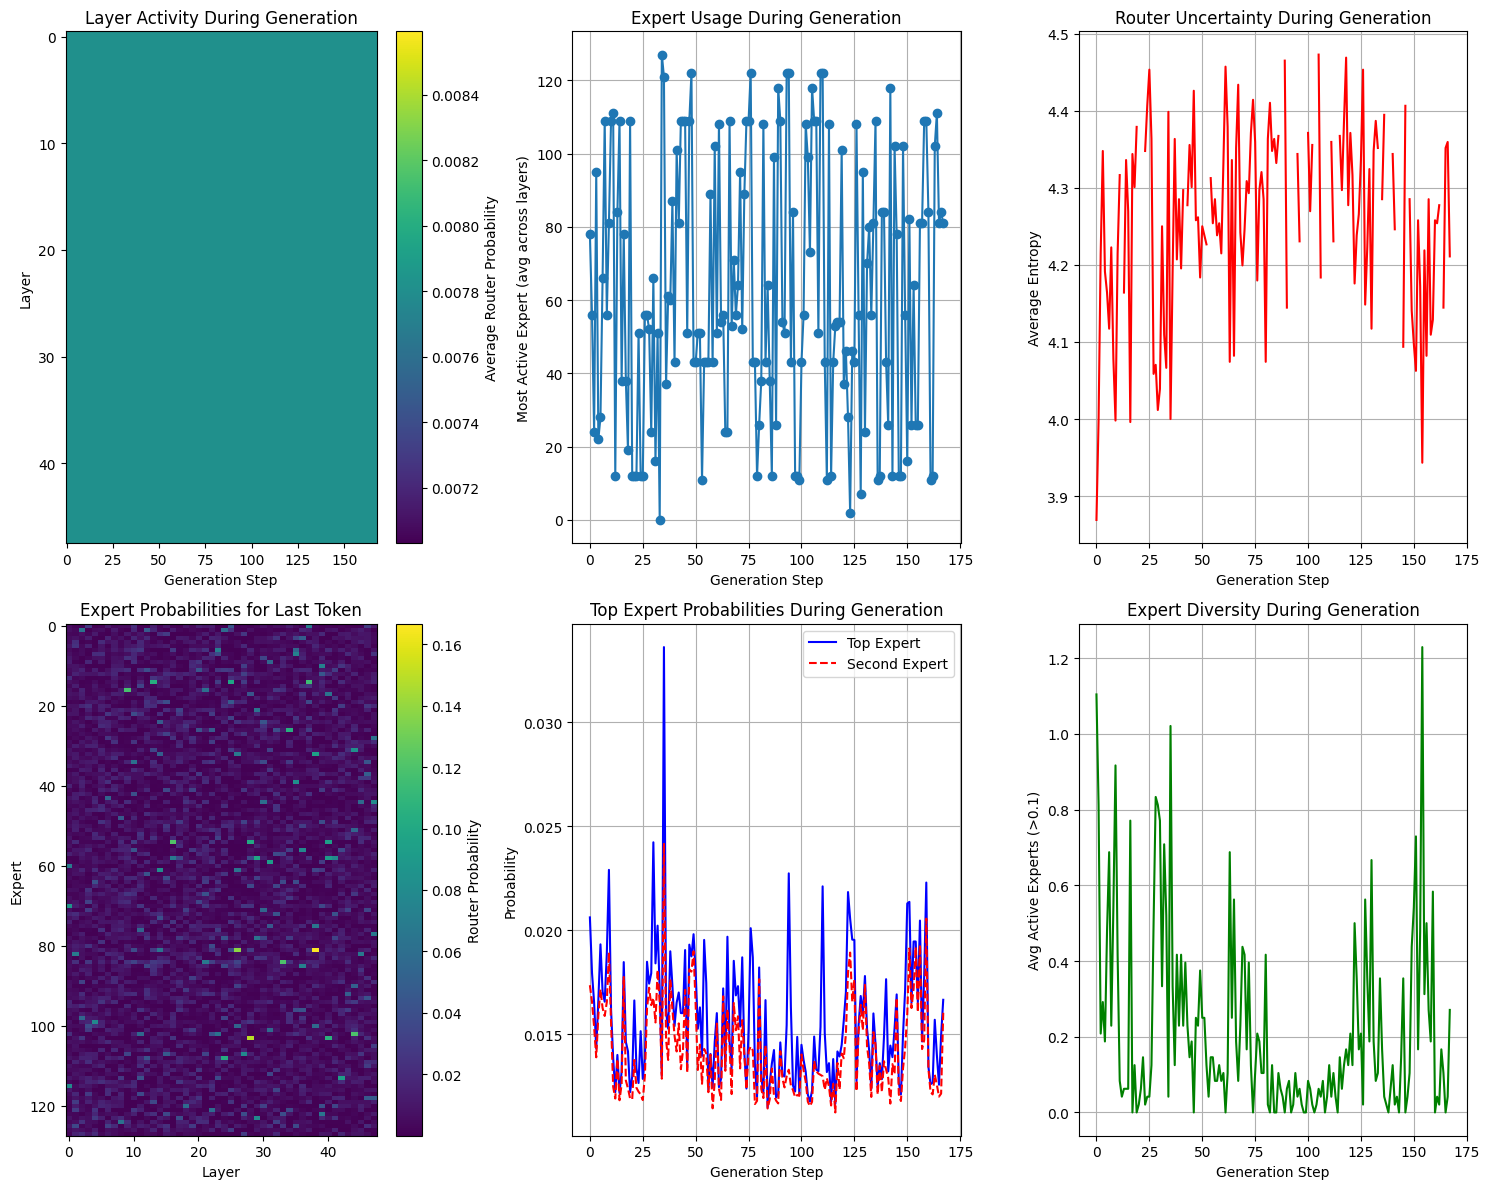


Generation Analysis:
Number of generated tokens: 168
Number of layers: 48
Number of experts: 128

Generated tokens with their router probabilities:
Step  0: Token 'To' (ID: 1249)
  Layer  0: Expert 84(0.128), Expert 16(0.109), Expert 1(0.062), Expert 98(0.049), Expert 114(0.044), entropy=3.994
  Layer  1: Expert 119(0.164), Expert 127(0.132), Expert 121(0.128), Expert 82(0.041), Expert 15(0.030), entropy=3.617
  Layer  2: Expert 95(0.080), Expert 82(0.068), Expert 80(0.064), Expert 47(0.052), Expert 38(0.036), entropy=4.152
  Layer  3: Expert 120(0.122), Expert 115(0.074), Expert 16(0.053), Expert 82(0.042), Expert 124(0.041), entropy=4.191
  Layer  4: Expert 52(0.073), Expert 81(0.072), Expert 115(0.044), Expert 73(0.036), Expert 109(0.036), entropy=4.266
  ... and 43 more layers

Step  1: Token ' find' (ID: 1477)
  Layer  0: Expert 50(0.134), Expert 21(0.063), Expert 93(0.061), Expert 11(0.050), Expert 60(0.044), entropy=4.090
  Layer  1: Expert 119(0.082), Expert 6(0.063), Expert 1

In [21]:
# Analyze layerwise router probabilities for a given question
import torch
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
outputs = None

def analyze_router_probabilities(model, question, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Analyze router probabilities across layers for a given question.
    This function assumes the model has mixture of experts (MoE) architecture.
    """
    
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    
    # Format the question using the chat template
    messages = [
        {"role": "user", "content": question}
    ]
    formatted_text = tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
    )
    
    # Tokenize the formatted question
    inputs = tokenizer(formatted_text, return_tensors="pt").to(device)
    
    # Generate response while collecting router probabilities for each token
    print(f"Question: {question}")
    print(f"Formatted input: {formatted_text}")
    print("\nGenerating model response with router probability tracking...")
    
    all_router_probs = []
    generated_tokens = []
    
    with torch.no_grad():
        # Start with the input tokens
        input_ids = inputs['input_ids']
        attention_mask = inputs.get('attention_mask', None)
        
        for step in range(256):  # max_new_tokens
            # Forward pass with router logits
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                output_router_logits=True,
                use_cache=True
            )
            print(len(outputs.router_logits), outputs.router_logits[0].shape)            
            # Get router logits for this generation step
            router_logits = outputs.router_logits
            
            # Convert logits to probabilities for each layer
            step_router_probs = []
            for layer_logits in router_logits:
                # Apply softmax to get probabilities
                probs = torch.softmax(layer_logits, dim=-1)
                # Take the probabilities for the last token (the one being generated)
                last_token_probs = probs[-1, :].cpu().numpy()
                step_router_probs.append(last_token_probs)
            
            all_router_probs.append(step_router_probs)
            
            # Get next token
            logits = outputs.logits
            next_token_logits = logits[:, -1, :]
            next_token_id = torch.argmax(next_token_logits, dim=-1, keepdim=True)
            
            # Store the generated token
            generated_tokens.append(next_token_id.item())
            
            # Check for EOS token
            if next_token_id.item() == tokenizer.eos_token_id:
                break
                
            # Update input_ids for next iteration
            input_ids = torch.cat([input_ids, next_token_id], dim=-1)
            if attention_mask is not None:
                attention_mask = torch.cat([attention_mask, torch.ones_like(next_token_id)], dim=-1)
    
    # Decode and print the response
    generated_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)
    print(f"\nModel Response: {generated_text}")
    print("="*80)
    
    # Convert to numpy arrays for analysis
    # all_router_probs is [num_generated_tokens, num_layers, batch_size, num_experts]
    num_generated_tokens = len(all_router_probs)
    num_layers = len(all_router_probs[0])
    num_experts = all_router_probs[0][0].shape[-1]
    
    # Reshape for easier analysis: [num_layers, num_generated_tokens, num_experts]
    router_probs_array = np.array([[all_router_probs[token][layer].squeeze() 
                                   for token in range(num_generated_tokens)] 
                                  for layer in range(num_layers)])
    
    # Visualize router probabilities during generation
    plt.figure(figsize=(15, 12))
    
    # Plot heatmap of router probabilities across layers and generation steps
    plt.subplot(2, 3, 1)
    # Average across experts to show layer activity over time
    layer_activity = np.mean(router_probs_array, axis=2)
    plt.imshow(layer_activity, aspect='auto', cmap='viridis')
    plt.colorbar(label='Average Router Probability')
    plt.xlabel('Generation Step')
    plt.ylabel('Layer')
    plt.title('Layer Activity During Generation')
    
    # Plot expert utilization across generation steps
    plt.subplot(2, 3, 2)
    # For each generation step, find the most active expert across all layers
    most_active_experts = np.argmax(np.mean(router_probs_array, axis=0), axis=1)
    plt.plot(range(num_generated_tokens), most_active_experts, 'o-')
    plt.xlabel('Generation Step')
    plt.ylabel('Most Active Expert (avg across layers)')
    plt.title('Expert Usage During Generation')
    plt.grid(True)
    
    # Plot router entropy during generation (averaged across layers)
    plt.subplot(2, 3, 3)
    entropy_over_time = []
    for token_step in range(num_generated_tokens):
        token_entropy = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            entropy = -np.sum(probs * np.log(probs + 1e-10))
            token_entropy.append(entropy)
        entropy_over_time.append(np.mean(token_entropy))
    
    plt.plot(range(num_generated_tokens), entropy_over_time, 'r-')
    plt.xlabel('Generation Step')
    plt.ylabel('Average Entropy')
    plt.title('Router Uncertainty During Generation')
    plt.grid(True)
    
    # Plot layer-wise expert distribution for the last generated token
    plt.subplot(2, 3, 4)
    if num_generated_tokens > 0:
        last_token_probs = router_probs_array[:, -1, :]  # [num_layers, num_experts]
        plt.imshow(last_token_probs.T, aspect='auto', cmap='viridis')
        plt.colorbar(label='Router Probability')
        plt.xlabel('Layer')
        plt.ylabel('Expert')
        plt.title('Expert Probabilities for Last Token')
    
    # Plot top expert probability trends
    plt.subplot(2, 3, 5)
    top_expert_probs = []
    second_expert_probs = []
    for token_step in range(num_generated_tokens):
        # Average across layers for this token
        avg_probs = np.mean(router_probs_array[:, token_step, :], axis=0)
        sorted_probs = np.sort(avg_probs)
        top_expert_probs.append(sorted_probs[-1])
        second_expert_probs.append(sorted_probs[-2])
    
    plt.plot(range(num_generated_tokens), top_expert_probs, 'b-', label='Top Expert')
    plt.plot(range(num_generated_tokens), second_expert_probs, 'r--', label='Second Expert')
    plt.xlabel('Generation Step')
    plt.ylabel('Probability')
    plt.title('Top Expert Probabilities During Generation')
    plt.legend()
    plt.grid(True)
    
    # Plot expert diversity (number of experts with >threshold probability)
    plt.subplot(2, 3, 6)
    expert_diversity = []
    threshold = 0.1
    for token_step in range(num_generated_tokens):
        # Count experts with probability > threshold across all layers
        active_experts = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            active_count = np.sum(probs > threshold)
            active_experts.append(active_count)
        expert_diversity.append(np.mean(active_experts))
    
    plt.plot(range(num_generated_tokens), expert_diversity, 'g-')
    plt.xlabel('Generation Step')
    plt.ylabel(f'Avg Active Experts (>{threshold})')
    plt.title('Expert Diversity During Generation')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nGeneration Analysis:")
    print(f"Number of generated tokens: {num_generated_tokens}")
    print(f"Number of layers: {num_layers}")
    print(f"Number of experts: {num_experts}")
    
    print(f"\nGenerated tokens with their router probabilities:")
    for i, token_id in enumerate(generated_tokens):
        token_text = tokenizer.decode([token_id])
        print(f"Step {i:2d}: Token '{token_text}' (ID: {token_id})")
        
        # Show most active experts per layer for this token
        for layer in range(min(5, num_layers)):  # Show first 5 layers
            probs = router_probs_array[layer, i, :]
            # Get top 5 experts
            top_5_indices = np.argsort(probs)[-5:][::-1]  # Sort and get top 5, reverse for descending order
            top_5_probs = probs[top_5_indices]
            entropy_val = -np.sum(probs * np.log(probs + 1e-10))
            
            expert_str = ", ".join([f"Expert {idx}({prob:.3f})" for idx, prob in zip(top_5_indices, top_5_probs)])
            print(f"  Layer {layer:2d}: {expert_str}, entropy={entropy_val:.3f}")
        
        if num_layers > 5:
            print(f"  ... and {num_layers - 5} more layers")
        print()
    
    return all_router_probs, router_probs_array, generated_text

# Example usage with a mathematical question

# try:
router_probs, router_array, model_output = analyze_router_probabilities(model, question)
print(f"\nRouter probabilities shape: {router_array.shape}")
print("Format: [num_layers, num_generated_tokens, num_experts]")
# except Exception as e:
#     print(f"Error analyzing router probabilities: {e}")
#     print("Note: This analysis requires a model with Mixture of Experts (MoE) architecture.")
#     print("Make sure to use a model that outputs router logits.")


Question: Who is the president of the United States?
Formatted input: <|im_start|>user
Who is the president of the United States?<|im_end|>
<|im_start|>assistant


Generating model response with router probability tracking...
48 torch.Size([17, 128])
48 torch.Size([18, 128])
48 torch.Size([19, 128])
48 torch.Size([20, 128])
48 torch.Size([21, 128])
48 torch.Size([22, 128])
48 torch.Size([23, 128])
48 torch.Size([24, 128])
48 torch.Size([25, 128])
48 torch.Size([26, 128])
48 torch.Size([27, 128])
48 torch.Size([28, 128])
48 torch.Size([29, 128])
48 torch.Size([30, 128])
48 torch.Size([31, 128])
48 torch.Size([32, 128])
48 torch.Size([33, 128])
48 torch.Size([34, 128])
48 torch.Size([35, 128])
48 torch.Size([36, 128])
48 torch.Size([37, 128])
48 torch.Size([38, 128])
48 torch.Size([39, 128])
48 torch.Size([40, 128])
48 torch.Size([41, 128])
48 torch.Size([42, 128])
48 torch.Size([43, 128])
48 torch.Size([44, 128])
48 torch.Size([45, 128])
48 torch.Size([46, 128])
48 torch.Size([47, 128])

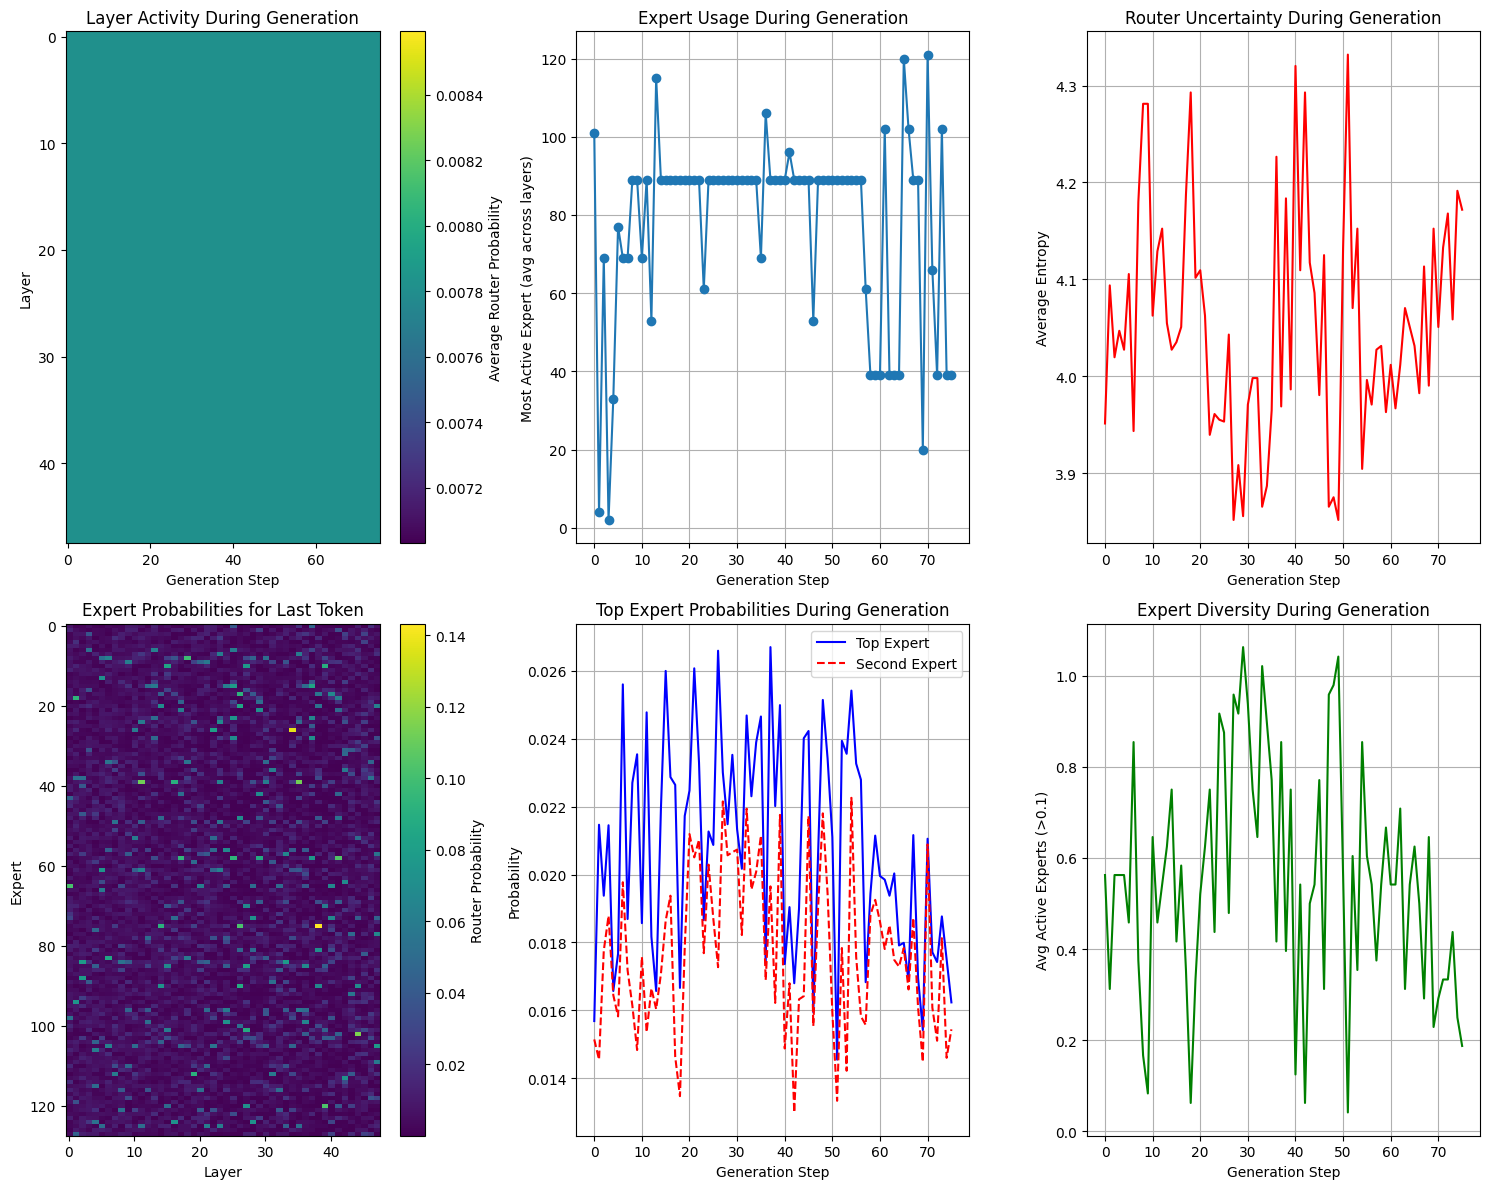


Generation Analysis:
Number of generated tokens: 76
Number of layers: 48
Number of experts: 128

Generated tokens with their router probabilities:
Step  0: Token 'As' (ID: 2121)
  Layer  0: Expert 84(0.137), Expert 16(0.097), Expert 1(0.055), Expert 98(0.050), Expert 114(0.049), entropy=4.008
  Layer  1: Expert 127(0.196), Expert 119(0.136), Expert 121(0.093), Expert 82(0.034), Expert 70(0.032), entropy=3.631
  Layer  2: Expert 82(0.070), Expert 80(0.063), Expert 95(0.052), Expert 40(0.042), Expert 2(0.040), entropy=4.184
  Layer  3: Expert 120(0.101), Expert 124(0.087), Expert 115(0.062), Expert 16(0.052), Expert 82(0.044), entropy=4.180
  Layer  4: Expert 81(0.073), Expert 115(0.048), Expert 73(0.038), Expert 52(0.037), Expert 85(0.033), entropy=4.332
  ... and 43 more layers

Step  1: Token ' of' (ID: 315)
  Layer  0: Expert 50(0.115), Expert 63(0.075), Expert 21(0.075), Expert 75(0.052), Expert 93(0.038), entropy=4.121
  Layer  1: Expert 6(0.071), Expert 116(0.056), Expert 125(0.0

In [22]:
# Analyze layerwise router probabilities for a given question
import torch
import matplotlib.pyplot as plt
import numpy as np
from transformers import AutoTokenizer, AutoModelForCausalLM
outputs = None
question = "Who is the president of the United States?"

def analyze_router_probabilities(model, question, device='cuda' if torch.cuda.is_available() else 'cpu'):
    """
    Analyze router probabilities across layers for a given question.
    This function assumes the model has mixture of experts (MoE) architecture.
    """
    
    # Load model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    
    
    # Format the question using the chat template
    messages = [
        {"role": "user", "content": question}
    ]
    formatted_text = tokenizer.apply_chat_template(
        messages, 
        tokenize=False, 
        add_generation_prompt=True
    )
    
    # Tokenize the formatted question
    inputs = tokenizer(formatted_text, return_tensors="pt").to(device)
    
    # Generate response while collecting router probabilities for each token
    print(f"Question: {question}")
    print(f"Formatted input: {formatted_text}")
    print("\nGenerating model response with router probability tracking...")
    
    all_router_probs = []
    generated_tokens = []
    
    with torch.no_grad():
        # Start with the input tokens
        input_ids = inputs['input_ids']
        attention_mask = inputs.get('attention_mask', None)
        
        for step in range(256):  # max_new_tokens
            # Forward pass with router logits
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                output_router_logits=True,
                use_cache=True
            )
            print(len(outputs.router_logits), outputs.router_logits[0].shape)            
            # Get router logits for this generation step
            router_logits = outputs.router_logits
            
            # Convert logits to probabilities for each layer
            step_router_probs = []
            for layer_logits in router_logits:
                # Apply softmax to get probabilities
                probs = torch.softmax(layer_logits, dim=-1)
                # Take the probabilities for the last token (the one being generated)
                last_token_probs = probs[-1, :].cpu().numpy()
                step_router_probs.append(last_token_probs)
            
            all_router_probs.append(step_router_probs)
            
            # Get next token
            logits = outputs.logits
            next_token_logits = logits[:, -1, :]
            next_token_id = torch.argmax(next_token_logits, dim=-1, keepdim=True)
            
            # Store the generated token
            generated_tokens.append(next_token_id.item())
            
            # Check for EOS token
            if next_token_id.item() == tokenizer.eos_token_id:
                break
                
            # Update input_ids for next iteration
            input_ids = torch.cat([input_ids, next_token_id], dim=-1)
            if attention_mask is not None:
                attention_mask = torch.cat([attention_mask, torch.ones_like(next_token_id)], dim=-1)
    
    # Decode and print the response
    generated_text = tokenizer.decode(generated_tokens, skip_special_tokens=True)
    print(f"\nModel Response: {generated_text}")
    print("="*80)
    
    # Convert to numpy arrays for analysis
    # all_router_probs is [num_generated_tokens, num_layers, batch_size, num_experts]
    num_generated_tokens = len(all_router_probs)
    num_layers = len(all_router_probs[0])
    num_experts = all_router_probs[0][0].shape[-1]
    
    # Reshape for easier analysis: [num_layers, num_generated_tokens, num_experts]
    router_probs_array = np.array([[all_router_probs[token][layer].squeeze() 
                                   for token in range(num_generated_tokens)] 
                                  for layer in range(num_layers)])
    
    # Visualize router probabilities during generation
    plt.figure(figsize=(15, 12))
    
    # Plot heatmap of router probabilities across layers and generation steps
    plt.subplot(2, 3, 1)
    # Average across experts to show layer activity over time
    layer_activity = np.mean(router_probs_array, axis=2)
    plt.imshow(layer_activity, aspect='auto', cmap='viridis')
    plt.colorbar(label='Average Router Probability')
    plt.xlabel('Generation Step')
    plt.ylabel('Layer')
    plt.title('Layer Activity During Generation')
    
    # Plot expert utilization across generation steps
    plt.subplot(2, 3, 2)
    # For each generation step, find the most active expert across all layers
    most_active_experts = np.argmax(np.mean(router_probs_array, axis=0), axis=1)
    plt.plot(range(num_generated_tokens), most_active_experts, 'o-')
    plt.xlabel('Generation Step')
    plt.ylabel('Most Active Expert (avg across layers)')
    plt.title('Expert Usage During Generation')
    plt.grid(True)
    
    # Plot router entropy during generation (averaged across layers)
    plt.subplot(2, 3, 3)
    entropy_over_time = []
    for token_step in range(num_generated_tokens):
        token_entropy = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            entropy = -np.sum(probs * np.log(probs + 1e-10))
            token_entropy.append(entropy)
        entropy_over_time.append(np.mean(token_entropy))
    
    plt.plot(range(num_generated_tokens), entropy_over_time, 'r-')
    plt.xlabel('Generation Step')
    plt.ylabel('Average Entropy')
    plt.title('Router Uncertainty During Generation')
    plt.grid(True)
    
    # Plot layer-wise expert distribution for the last generated token
    plt.subplot(2, 3, 4)
    if num_generated_tokens > 0:
        last_token_probs = router_probs_array[:, -1, :]  # [num_layers, num_experts]
        plt.imshow(last_token_probs.T, aspect='auto', cmap='viridis')
        plt.colorbar(label='Router Probability')
        plt.xlabel('Layer')
        plt.ylabel('Expert')
        plt.title('Expert Probabilities for Last Token')
    
    # Plot top expert probability trends
    plt.subplot(2, 3, 5)
    top_expert_probs = []
    second_expert_probs = []
    for token_step in range(num_generated_tokens):
        # Average across layers for this token
        avg_probs = np.mean(router_probs_array[:, token_step, :], axis=0)
        sorted_probs = np.sort(avg_probs)
        top_expert_probs.append(sorted_probs[-1])
        second_expert_probs.append(sorted_probs[-2])
    
    plt.plot(range(num_generated_tokens), top_expert_probs, 'b-', label='Top Expert')
    plt.plot(range(num_generated_tokens), second_expert_probs, 'r--', label='Second Expert')
    plt.xlabel('Generation Step')
    plt.ylabel('Probability')
    plt.title('Top Expert Probabilities During Generation')
    plt.legend()
    plt.grid(True)
    
    # Plot expert diversity (number of experts with >threshold probability)
    plt.subplot(2, 3, 6)
    expert_diversity = []
    threshold = 0.1
    for token_step in range(num_generated_tokens):
        # Count experts with probability > threshold across all layers
        active_experts = []
        for layer in range(num_layers):
            probs = router_probs_array[layer, token_step, :]
            active_count = np.sum(probs > threshold)
            active_experts.append(active_count)
        expert_diversity.append(np.mean(active_experts))
    
    plt.plot(range(num_generated_tokens), expert_diversity, 'g-')
    plt.xlabel('Generation Step')
    plt.ylabel(f'Avg Active Experts (>{threshold})')
    plt.title('Expert Diversity During Generation')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print detailed analysis
    print(f"\nGeneration Analysis:")
    print(f"Number of generated tokens: {num_generated_tokens}")
    print(f"Number of layers: {num_layers}")
    print(f"Number of experts: {num_experts}")
    
    print(f"\nGenerated tokens with their router probabilities:")
    for i, token_id in enumerate(generated_tokens):
        token_text = tokenizer.decode([token_id])
        print(f"Step {i:2d}: Token '{token_text}' (ID: {token_id})")
        
        # Show most active experts per layer for this token
        for layer in range(min(5, num_layers)):  # Show first 5 layers
            probs = router_probs_array[layer, i, :]
            # Get top 5 experts
            top_5_indices = np.argsort(probs)[-5:][::-1]  # Sort and get top 5, reverse for descending order
            top_5_probs = probs[top_5_indices]
            entropy_val = -np.sum(probs * np.log(probs + 1e-10))
            
            expert_str = ", ".join([f"Expert {idx}({prob:.3f})" for idx, prob in zip(top_5_indices, top_5_probs)])
            print(f"  Layer {layer:2d}: {expert_str}, entropy={entropy_val:.3f}")
        
        if num_layers > 5:
            print(f"  ... and {num_layers - 5} more layers")
        print()
    
    return all_router_probs, router_probs_array, generated_text

# Example usage with a mathematical question

# try:
router_probs, router_array, model_output = analyze_router_probabilities(model, question)
print(f"\nRouter probabilities shape: {router_array.shape}")
print("Format: [num_layers, num_generated_tokens, num_experts]")
# except Exception as e:
#     print(f"Error analyzing router probabilities: {e}")
#     print("Note: This analysis requires a model with Mixture of Experts (MoE) architecture.")
#     print("Make sure to use a model that outputs router logits.")


In [58]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Qwen2.5-32B-Instruct model
model_name = "/checkpoint/compact-models/rishabhtiwari/adaptive_reasoning/experiments/01_training/saved_models/OpenThinker3-30B-base-1235229"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    output_router_logits=True
)

Loading checkpoint shards: 100%|██████████| 13/13 [00:13<00:00,  1.06s/it]


In [25]:
# tokenizer = AutoTokenizer.from_pretrained('Qwen/Qwen3-30B-A3B')
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [ ]:

# Define a math problem
math_problem = """
Solve the following step by step:
A train travels 180 km in 2 hours. If it maintains the same speed, how long will it take to travel 450 km?
"""

messages = [
    {"role": "user", "content": math_problem}
]
# Tokenize the input
# inputs = tokenizer(math_problem, return_tensors="pt", add_generation_prompt=True)
inputs = tokenizer.apply_chat_template(messages, tokenize=True, add_generation_prompt=True, return_tensors="pt")

# Generate response first without router logits to avoid tensor mismatch
with torch.no_grad():
    outputs = model.generate(
        inputs.to(model.device),
        max_new_tokens=200,
        do_sample=False,
        return_dict_in_generate=True,
        output_router_logits=False,
        pad_token_id=tokenizer.eos_token_id,
        attention_mask=torch.ones_like(inputs)
    )


# Now capture router logits by doing a forward pass on the full generated sequence


In [52]:
# Save outputs to a file
import pickle
import os

# Create directory if it doesn't exist
os.makedirs('outputs_data', exist_ok=True)

# Save outputs
outputs_file = 'outputs_data/outputs.pkl'
with open(outputs_file, 'wb') as f:
    pickle.dump(outputs, f)

print(f"Outputs saved to {outputs_file}")

# Load outputs from file
with open(outputs_file, 'rb') as f:
    loaded_outputs = pickle.load(f)

print(f"Outputs loaded from {outputs_file}")

# Use the loaded outputs for further processing
outputs = loaded_outputs


Outputs saved to outputs_data/outputs.pkl
Outputs loaded from outputs_data/outputs.pkl


In [59]:
generated_ids = outputs.sequences
attention_mask_full = torch.ones_like(generated_ids).to(model.device)

# Forward pass to get router logits for the complete sequence
with torch.no_grad():
    forward_outputs = model(
        input_ids=generated_ids,
        attention_mask=attention_mask_full,
        output_router_logits=True,
        return_dict=True
    )

In [60]:
# Extract router logits from the forward pass
router_logits = forward_outputs.router_logits
print(len(router_logits))

48


In [120]:
# router_logits = forward_outputs.router_logits
# # Save router logits to a file
# import pickle
# import os

# # Create directory if it doesn't exist
# os.makedirs('router_logits_data', exist_ok=True)

# # Save router logits
router_logits_file = 'router_logits_data/router_logits_dynamic.pkl'
# with open(router_logits_file, 'wb') as f:
#     pickle.dump(router_logits, f)

# print(f"Router logits saved to {router_logits_file}")

# Load router logits from file
with open(router_logits_file, 'rb') as f:
    loaded_router_logits = pickle.load(f)

print(f"Router logits loaded from {router_logits_file}")
print(f"Number of layers with router logits: {len(loaded_router_logits)}")

# Use the loaded router logits for further analysis
router_logits = loaded_router_logits


Router logits loaded from router_logits_data/router_logits_dynamic.pkl
Number of layers with router logits: 48


In [149]:
total = 0
for layer_logits in router_logits:
    layer_probs = torch.softmax(layer_logits, dim=-1)
    layer_probs = layer_probs > 0.014
    total += layer_probs.sum()
print(len(router_logits), router_logits[0].shape)
print(total/(48*249))


48 torch.Size([249, 128])
tensor(14.4186)


In [137]:
torch.softmax(router_logits[0], dim=-1)

tensor([[0.0085, 0.0018, 0.0091,  ..., 0.0072, 0.0089, 0.0098],
        [0.0082, 0.0022, 0.0054,  ..., 0.0320, 0.0041, 0.0032],
        [0.0021, 0.0271, 0.0011,  ..., 0.0032, 0.0013, 0.0024],
        ...,
        [0.0090, 0.0041, 0.0053,  ..., 0.0072, 0.0053, 0.0060],
        [0.0099, 0.0058, 0.0060,  ..., 0.0055, 0.0044, 0.0034],
        [0.0090, 0.0112, 0.0072,  ..., 0.0050, 0.0026, 0.0168]],
       dtype=torch.bfloat16)

In [138]:
r_logits = router_logits[0]
router_probs = torch.softmax(router_logits[0], dim=-1)

In [140]:
mask = router_probs < 0.016
r_logits_masked = r_logits.masked_fill(mask, float('-inf'))

In [141]:
mask

tensor([[ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ..., False,  True,  True],
        [ True, False,  True,  ...,  True,  True,  True],
        ...,
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True,  True],
        [ True,  True,  True,  ...,  True,  True, False]])

In [142]:
r_logits_probs = torch.softmax(r_logits_masked, dim=-1)

In [143]:
(r_logits_probs>0).sum(1)

tensor([12, 13,  7, 12, 11,  9,  8, 12,  9, 11,  7, 12,  9,  8, 13, 12, 10, 10,
         9,  9, 14, 14,  7,  6,  7,  5, 11,  9,  7, 10,  5,  6,  6,  5,  7,  9,
         6,  8, 15, 10, 10, 13,  8,  9, 13,  7,  9,  9,  7, 10, 10,  9,  7,  8,
         9, 11,  9,  7,  7,  7,  5,  7,  7,  6,  9,  8,  8,  9, 15, 10,  9, 12,
         8, 10,  6, 11, 11,  6, 10,  9,  8,  6,  7, 17, 15, 10, 11,  9, 10, 14,
        14,  7,  5,  6,  7,  7,  7, 10,  8,  8,  7, 10,  7, 10,  6, 11,  8,  9,
         6,  9,  9, 13,  8, 11,  5,  6,  7,  7,  7,  9, 11,  8, 12,  9,  9,  5,
        11,  7,  7,  9, 10,  4,  8, 14, 12, 10, 11,  8,  9, 15, 14,  7,  5,  7,
         7, 12,  7,  9,  7, 10,  6, 12,  6,  7,  6,  8,  9, 11,  7, 10,  9,  8,
        10,  7, 13, 11,  9, 11,  8,  8, 16, 10,  7,  6,  7,  9, 13, 12,  9, 10,
         8,  8, 15, 13,  7,  7,  6,  7, 15, 13, 10,  5,  7, 10,  9, 11, 13, 11,
        11,  8,  8,  7,  5,  8,  7,  8,  7,  9,  6, 11,  6, 15, 12,  8, 17, 11,
        11,  9, 15, 14,  9, 11,  5,  8, 

In [96]:
r_logits_probs.shape

torch.Size([249, 128])

Math Problem: 
Solve the following step by step:
A train travels 180 km in 2 hours. If it maintains the same speed, how long will it take to travel 450 km?


Generated Response:
 km?

assistant
<think> Okay, so I need to figure out how long it will take for the train to travel 450 km if it maintains the same speed as when it went 180 km in 2 hours. Hmm, let me think. 

First, I remember that speed is calculated by dividing the distance by the time. So maybe I should start by finding the train's speed. The problem says it travels 180 km in 2 hours. Let me write that down:

Speed = Distance / Time

So plugging in the numbers:

Speed = 180 km / 2 hours

Hmm, 180 divided by 2... that should be 90. So the speed is 90 km per hour. Let me check that again. Yeah, 2 times 90 is 180, so that makes sense. 

Now, the question is asking how long it will take to travel 450 km at the

ROUTER ANALYSIS
torch.Size([249, 128])
Layer 0
top-8 probabilities: 0.0176
  Sum of top-8 probabilities: 0.2832
top-1

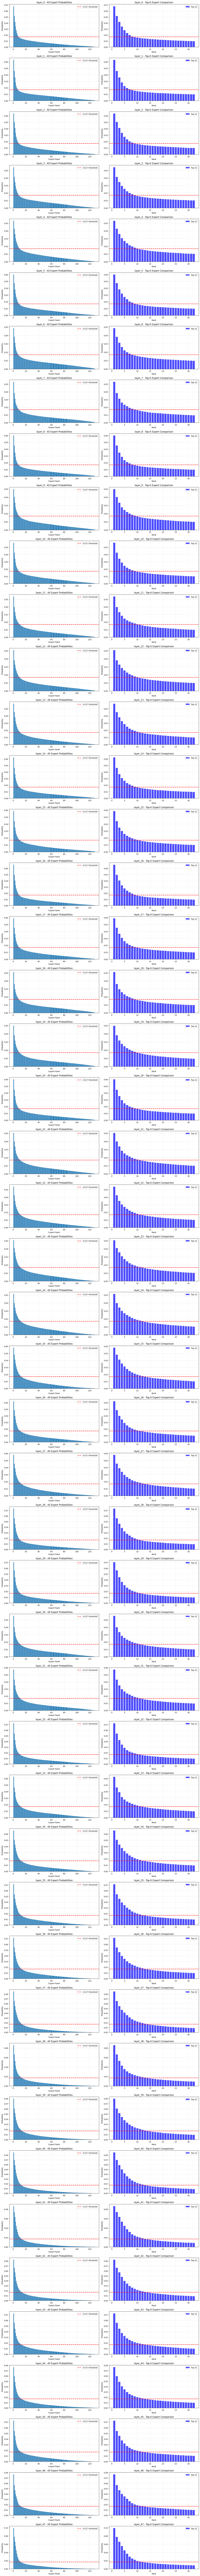


EXPERT UTILIZATION STATISTICS

layer_0:
  Total experts: 128
  Max probability: 0.0679 (Expert 0)
  Min probability: 0.0002 (Expert 127)
  Probability std: 0.0091
  Entropy: 4.4242
  Effective number of experts: 83.45

layer_1:
  Total experts: 128
  Max probability: 0.0630 (Expert 0)
  Min probability: 0.0004 (Expert 127)
  Probability std: 0.0080
  Entropy: 4.5032
  Effective number of experts: 90.31

layer_2:
  Total experts: 128
  Max probability: 0.0635 (Expert 0)
  Min probability: 0.0003 (Expert 127)
  Probability std: 0.0088
  Entropy: 4.4361
  Effective number of experts: 84.44

layer_3:
  Total experts: 128
  Max probability: 0.0542 (Expert 0)
  Min probability: 0.0003 (Expert 127)
  Probability std: 0.0076
  Entropy: 4.5008
  Effective number of experts: 90.09

layer_4:
  Total experts: 128
  Max probability: 0.0530 (Expert 0)
  Min probability: 0.0002 (Expert 127)
  Probability std: 0.0079
  Entropy: 4.4725
  Effective number of experts: 87.58

layer_5:
  Total experts: 12

In [64]:


# raise Exception("Stop here")

# Analyze router probabilities for each layer
def analyze_router_probabilities(router_logits, top_k_values=[8, 16, 24]):
    """Analyze and visualize router probabilities for MoE layers"""
    
    results = {}
    
    for layer_idx, layer_logits in enumerate(router_logits):
        if layer_logits is not None:
            # Convert logits to probabilities
            probs = torch.softmax(layer_logits, dim=-1)
            
            # Average across tokens and batch dimension
            # Sort probabilities for analysis
            sorted_probs, sorted_indices = torch.sort(probs, dim=-1, descending=True)
            print(sorted_probs.shape)
            avg_probs = sorted_probs[49:].mean(dim=(0))  # Shape: [num_experts]
            # avg_probs = probs[145]
            # print(avg_probs.shape)
            # raise Exception("Stop here")
            
            results[f'layer_{layer_idx}'] = {
                'probabilities': avg_probs.float().cpu().numpy(),
                'raw_logits': layer_logits.float().cpu().numpy()
            }
            
            # Analyze top-k expert selection
            print(f"Layer {layer_idx}")
            for k in top_k_values:
                top_k_indices = torch.topk(avg_probs, k=min(k, len(avg_probs))).indices
                top_k_probs = avg_probs[top_k_indices]
                
                
                # print(f"  Indices: {top_k_indices.tolist()}")
                # if k == 16:
                    # print(f"  Probabilities: {top_k_probs.tolist()}")
                print(f"top-{k} probabilities: {top_k_probs[-1].item():.4f}")
                print(f"  Sum of top-{k} probabilities: {top_k_probs.sum().item():.4f}")
            print(f"  Sum of all expert probabilities: {avg_probs.sum().item():.4f}")
    
    return results

# Analyze the router probabilities
print("Math Problem:", math_problem)
print("\nGenerated Response:")
generated_text = tokenizer.decode(outputs.sequences[0], skip_special_tokens=True)
print(generated_text[len(math_problem):])  # Show only the generated part

print("\n" + "="*50)
print("ROUTER ANALYSIS")
print("="*50)

router_results = analyze_router_probabilities(router_logits, top_k_values=[8, 16, 24])

# Visualize router probabilities
def plot_router_analysis(router_results, top_k_values=[8, 16, 20]):
    """Create visualizations for router probability analysis"""
    
    num_layers = len(router_results)
    if num_layers == 0:
        print("No MoE layers found in the model.")
        return
    
    # Create subplots for each layer
    fig, axes = plt.subplots(num_layers, 2, figsize=(15, 4*num_layers))
    if num_layers == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (layer_name, data) in enumerate(router_results.items()):
        probs = data['probabilities']
        
        # Plot 1: All expert probabilities
        axes[idx, 0].bar(range(1,len(probs)+1), probs)
        axes[idx, 0].set_title(f'{layer_name} - All Expert Probabilities')
        axes[idx, 0].set_xlabel('Expert Rank')
        axes[idx, 0].set_ylabel('Probability')
        axes[idx, 0].grid(True, alpha=0.3)
        # Add horizontal line at 0.017
        axes[idx, 0].axhline(y=0.017, color='red', linestyle='--', linewidth=2, label='0.017 threshold')
        axes[idx, 0].legend()
        
        # Plot 2: Top-k comparison
        colors = ['blue', 'red']
        x_offset = 1
        for k_idx, k in enumerate(top_k_values):
            top_k_indices = np.argsort(probs)[-k:][::-1]
            top_k_probs = probs[top_k_indices]
            
            x_pos = np.arange(len(top_k_probs)) + x_offset
            axes[idx, 1].bar(x_pos, top_k_probs, alpha=0.7, 
                           label=f'Top-{k}', color=colors[k_idx % len(colors)])
            x_offset += 0.4
        
        axes[idx, 1].set_title(f'{layer_name} - Top-K Expert Comparison')
        axes[idx, 1].set_xlabel('Rank')
        axes[idx, 1].set_ylabel('Probability')
        axes[idx, 1].legend()
        axes[idx, 1].grid(True, alpha=0.3)
        # Add horizontal line at 0.017
        axes[idx, 1].axhline(y=0.017, color='red', linestyle='--', linewidth=2, label='0.017 threshold')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
plot_router_analysis(router_results, top_k_values=[32])

# Additional analysis: Expert utilization statistics
print("\nEXPERT UTILIZATION STATISTICS")
print("="*40)

for layer_name, data in router_results.items():
    probs = data['probabilities']
    
    print(f"\n{layer_name}:")
    print(f"  Total experts: {len(probs)}")
    print(f"  Max probability: {probs.max():.4f} (Expert {probs.argmax()})")
    print(f"  Min probability: {probs.min():.4f} (Expert {probs.argmin()})")
    print(f"  Probability std: {probs.std():.4f}")
    print(f"  Entropy: {-np.sum(probs * np.log(probs + 1e-10)):.4f}")
    
    # Calculate effective number of experts (based on entropy)
    effective_experts = np.exp(-np.sum(probs * np.log(probs + 1e-10)))
    print(f"  Effective number of experts: {effective_experts:.2f}")


Math Problem: 
Solve the following step by step:
A train travels 180 km in 2 hours. If it maintains the same speed, how long will it take to travel 450 km?


Generated Response:
 km?

assistant
<think> Okay, so I need to figure out how long it will take for the train to travel 450 km if it maintains the same speed as when it went 180 km in 2 hours. Hmm, let me think. 

First, I remember that speed is calculated by dividing the distance by the time. So maybe I should start by finding the train's speed. The problem says it travels 180 km in 2 hours. Let me write that down:

Speed = Distance / Time

So plugging in the numbers:

Speed = 180 km / 2 hours

Hmm, 180 divided by 2... that should be 90. So the speed is 90 km per hour. Let me check that again. Yeah, 2 times 90 is 180, so that makes sense. 

Now, the question is asking how long it will take to travel 450 km at the

ROUTER ANALYSIS
torch.Size([249, 128])
Layer 0
top-8 probabilities: 0.0173
  Sum of top-8 probabilities: 0.3457
top-1

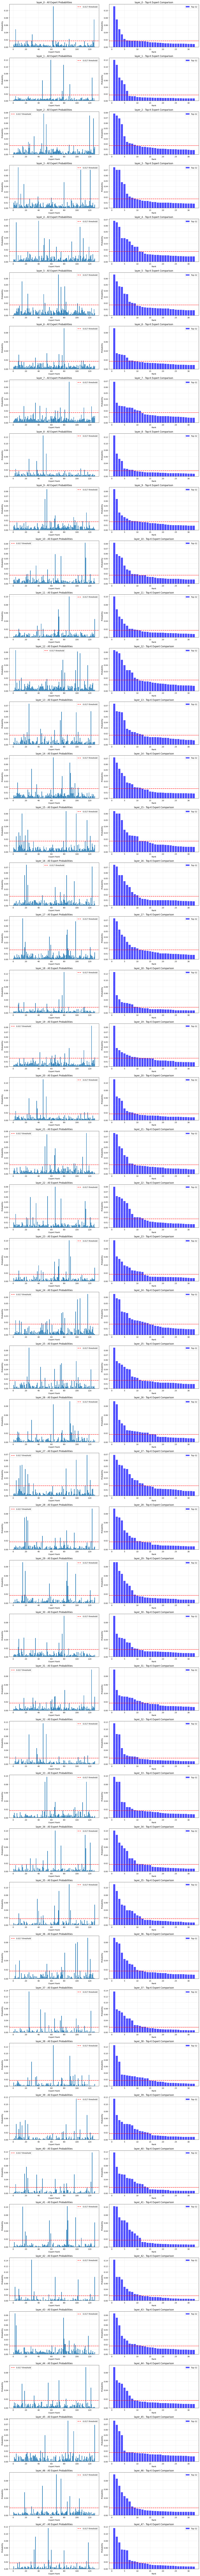


EXPERT UTILIZATION STATISTICS

layer_0:
  Total experts: 128
  Max probability: 0.1113 (Expert 62)
  Min probability: 0.0004 (Expert 98)
  Probability std: 0.0127
  Entropy: 4.2666
  Effective number of experts: 71.28

layer_1:
  Total experts: 128
  Max probability: 0.1201 (Expert 58)
  Min probability: 0.0003 (Expert 94)
  Probability std: 0.0160
  Entropy: 4.0482
  Effective number of experts: 57.29

layer_2:
  Total experts: 128
  Max probability: 0.0781 (Expert 47)
  Min probability: 0.0005 (Expert 38)
  Probability std: 0.0123
  Entropy: 4.2236
  Effective number of experts: 68.28

layer_3:
  Total experts: 128
  Max probability: 0.0752 (Expert 7)
  Min probability: 0.0002 (Expert 31)
  Probability std: 0.0119
  Entropy: 4.2514
  Effective number of experts: 70.20

layer_4:
  Total experts: 128
  Max probability: 0.0679 (Expert 39)
  Min probability: 0.0002 (Expert 5)
  Probability std: 0.0113
  Entropy: 4.2550
  Effective number of experts: 70.46

layer_5:
  Total experts: 128


In [62]:


# raise Exception("Stop here")

# Analyze router probabilities for each layer
def analyze_router_probabilities(router_logits, top_k_values=[8, 16, 24]):
    """Analyze and visualize router probabilities for MoE layers"""
    
    results = {}
    
    for layer_idx, layer_logits in enumerate(router_logits):
        if layer_logits is not None:
            # Convert logits to probabilities
            probs = torch.softmax(layer_logits, dim=-1)
            
            # Average across tokens and batch dimension
            # Sort probabilities for analysis
            sorted_probs, sorted_indices = torch.sort(probs, dim=-1, descending=True)
            print(sorted_probs.shape)
            # avg_probs = sorted_probs[49:].mean(dim=(0))  # Shape: [num_experts]
            avg_probs = probs[145]
            # print(avg_probs.shape)
            # raise Exception("Stop here")
            
            results[f'layer_{layer_idx}'] = {
                'probabilities': avg_probs.float().cpu().numpy(),
                'raw_logits': layer_logits.float().cpu().numpy()
            }
            
            # Analyze top-k expert selection
            print(f"Layer {layer_idx}")
            for k in top_k_values:
                top_k_indices = torch.topk(avg_probs, k=min(k, len(avg_probs))).indices
                top_k_probs = avg_probs[top_k_indices]
                
                
                # print(f"  Indices: {top_k_indices.tolist()}")
                # if k == 16:
                    # print(f"  Probabilities: {top_k_probs.tolist()}")
                print(f"top-{k} probabilities: {top_k_probs[-1].item():.4f}")
                print(f"  Sum of top-{k} probabilities: {top_k_probs.sum().item():.4f}")
            print(f"  Sum of all expert probabilities: {avg_probs.sum().item():.4f}")
    
    return results

# Analyze the router probabilities
print("Math Problem:", math_problem)
print("\nGenerated Response:")
generated_text = tokenizer.decode(outputs.sequences[0], skip_special_tokens=True)
print(generated_text[len(math_problem):])  # Show only the generated part

print("\n" + "="*50)
print("ROUTER ANALYSIS")
print("="*50)

router_results = analyze_router_probabilities(router_logits, top_k_values=[8, 16, 24])

# Visualize router probabilities
def plot_router_analysis(router_results, top_k_values=[8, 16, 20]):
    """Create visualizations for router probability analysis"""
    
    num_layers = len(router_results)
    if num_layers == 0:
        print("No MoE layers found in the model.")
        return
    
    # Create subplots for each layer
    fig, axes = plt.subplots(num_layers, 2, figsize=(15, 4*num_layers))
    if num_layers == 1:
        axes = axes.reshape(1, -1)
    
    for idx, (layer_name, data) in enumerate(router_results.items()):
        probs = data['probabilities']
        
        # Plot 1: All expert probabilities
        axes[idx, 0].bar(range(1,len(probs)+1), probs)
        axes[idx, 0].set_title(f'{layer_name} - All Expert Probabilities')
        axes[idx, 0].set_xlabel('Expert Rank')
        axes[idx, 0].set_ylabel('Probability')
        axes[idx, 0].grid(True, alpha=0.3)
        # Add horizontal line at 0.017
        axes[idx, 0].axhline(y=0.017, color='red', linestyle='--', linewidth=2, label='0.017 threshold')
        axes[idx, 0].legend()
        
        # Plot 2: Top-k comparison
        colors = ['blue', 'red']
        x_offset = 1
        for k_idx, k in enumerate(top_k_values):
            top_k_indices = np.argsort(probs)[-k:][::-1]
            top_k_probs = probs[top_k_indices]
            
            x_pos = np.arange(len(top_k_probs)) + x_offset
            axes[idx, 1].bar(x_pos, top_k_probs, alpha=0.7, 
                           label=f'Top-{k}', color=colors[k_idx % len(colors)])
            x_offset += 0.4
        
        axes[idx, 1].set_title(f'{layer_name} - Top-K Expert Comparison')
        axes[idx, 1].set_xlabel('Rank')
        axes[idx, 1].set_ylabel('Probability')
        axes[idx, 1].legend()
        axes[idx, 1].grid(True, alpha=0.3)
        # Add horizontal line at 0.017
        axes[idx, 1].axhline(y=0.017, color='red', linestyle='--', linewidth=2, label='0.017 threshold')
    
    plt.tight_layout()
    plt.show()

# Create visualizations
plot_router_analysis(router_results, top_k_values=[32])

# Additional analysis: Expert utilization statistics
print("\nEXPERT UTILIZATION STATISTICS")
print("="*40)

for layer_name, data in router_results.items():
    probs = data['probabilities']
    
    print(f"\n{layer_name}:")
    print(f"  Total experts: {len(probs)}")
    print(f"  Max probability: {probs.max():.4f} (Expert {probs.argmax()})")
    print(f"  Min probability: {probs.min():.4f} (Expert {probs.argmin()})")
    print(f"  Probability std: {probs.std():.4f}")
    print(f"  Entropy: {-np.sum(probs * np.log(probs + 1e-10)):.4f}")
    
    # Calculate effective number of experts (based on entropy)
    effective_experts = np.exp(-np.sum(probs * np.log(probs + 1e-10)))
    print(f"  Effective number of experts: {effective_experts:.2f}")


In [ ]:
0.017 - 0.012